In [13]:
%load_ext autoreload
%autoreload 2

In [66]:

import numpy as np
import pandas as pd
import seaborn as sns
from ccp.data_factory import DataFactory

from ccp.cca1 import Biclustering # First version of the algorithm
from ccp.cca2 import CCA  #second version (without normal randomization)

from IPython.display import display, Markdown, Latex
from tqdm import tqdm
import os
import time


## Uploading and preprocessing the Human B cells data

In [34]:
data_factory = DataFactory()


READ_FILE_PATH = f"{os.getcwd()}/data/raw/human_b_cells.txt"
WRITE_FILE_PATH = f"{os.getcwd()}/data/human_b_cells.csv"
FEATURE_SIZE = 96 # fixed value from https://arep.med.harvard.edu/biclustering/

# Preprocess the data
data_factory.clean_file(READ_FILE_PATH, WRITE_FILE_PATH)


The nhuman b-cells data is composed of 4026 rows and 96 columns, 4 bytes for each element, and 999 indicating a missing value. Let's verify next if we obtain the same data in the following cell.

In [60]:
# loading the data into a data frame
columns = np.array([f"Cond{i+1}" for i in range(FEATURE_SIZE)])
df = pd.read_csv(WRITE_FILE_PATH, names=columns)

column_names = df.columns.to_list() #extract the name of
data = df.to_numpy()

## checking for any null values 
display(Markdown('### Checking for NAN values - missing values in the data set'))
display(Markdown(df.isna().sum().to_markdown()))

### Checking for NAN values - missing values in the data set

|        |   0 |
|:-------|----:|
| Cond1  |   0 |
| Cond2  |   0 |
| Cond3  |   0 |
| Cond4  |   0 |
| Cond5  |   0 |
| Cond6  |   0 |
| Cond7  |   0 |
| Cond8  |   0 |
| Cond9  |   0 |
| Cond10 |   0 |
| Cond11 |   0 |
| Cond12 |   0 |
| Cond13 |   0 |
| Cond14 |   0 |
| Cond15 |   0 |
| Cond16 |   0 |
| Cond17 |   0 |
| Cond18 |   0 |
| Cond19 |   0 |
| Cond20 |   0 |
| Cond21 |   0 |
| Cond22 |   0 |
| Cond23 |   0 |
| Cond24 |   0 |
| Cond25 |   0 |
| Cond26 |   0 |
| Cond27 |   0 |
| Cond28 |   0 |
| Cond29 |   0 |
| Cond30 |   0 |
| Cond31 |   0 |
| Cond32 |   0 |
| Cond33 |   0 |
| Cond34 |   0 |
| Cond35 |   0 |
| Cond36 |   0 |
| Cond37 |   0 |
| Cond38 |   0 |
| Cond39 |   0 |
| Cond40 |   0 |
| Cond41 |   0 |
| Cond42 |   0 |
| Cond43 |   0 |
| Cond44 |   0 |
| Cond45 |   0 |
| Cond46 |   0 |
| Cond47 |   0 |
| Cond48 |   0 |
| Cond49 |   0 |
| Cond50 |   0 |
| Cond51 |   0 |
| Cond52 |   0 |
| Cond53 |   0 |
| Cond54 |   0 |
| Cond55 |   0 |
| Cond56 |   0 |
| Cond57 |   0 |
| Cond58 |   0 |
| Cond59 |   0 |
| Cond60 |   0 |
| Cond61 |   0 |
| Cond62 |   0 |
| Cond63 |   0 |
| Cond64 |   0 |
| Cond65 |   0 |
| Cond66 |   0 |
| Cond67 |   0 |
| Cond68 |   0 |
| Cond69 |   0 |
| Cond70 |   0 |
| Cond71 |   0 |
| Cond72 |   0 |
| Cond73 |   0 |
| Cond74 |   0 |
| Cond75 |   0 |
| Cond76 |   0 |
| Cond77 |   0 |
| Cond78 |   0 |
| Cond79 |   0 |
| Cond80 |   0 |
| Cond81 |   0 |
| Cond82 |   0 |
| Cond83 |   0 |
| Cond84 |   0 |
| Cond85 |   0 |
| Cond86 |   0 |
| Cond87 |   0 |
| Cond88 |   0 |
| Cond89 |   0 |
| Cond90 |   0 |
| Cond91 |   0 |
| Cond92 |   0 |
| Cond93 |   0 |
| Cond94 |   0 |
| Cond95 |   0 |
| Cond96 |   0 |

## Plotting & visualizing the data
In the next cells, we will be visualizing the human b-cells expression data matrix. To simplify the visualization we set a fixed number of genes below `NB_GENES`.

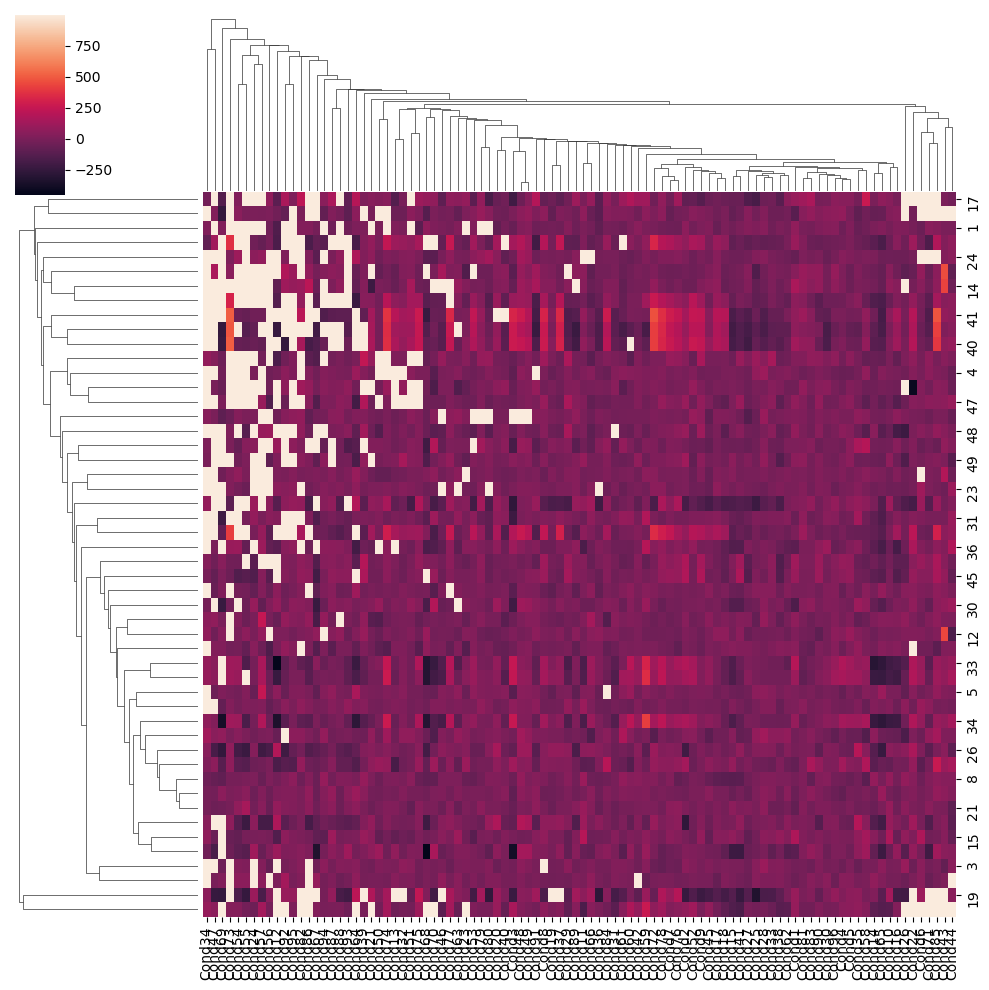

In [63]:
NB_GENES = 50
sns_plot = sns.clustermap(data[:NB_GENES], xticklabels=column_names)
sns_plot.savefig(f"./figures/human_cells_{NB_GENES}_heatmap.pdf")

## Experimenting with CC algorithm 
#### CC1 : Version that includes normal randomization
- The following cells represents experiments ran on both algorithm versions for generating `100` biclusters. The parameters for $\sigma$ & $\alpha$ are given below _(exactly like the paper)_
- In order to faciliate evaluating the process of experiments, the results will be recorded into csv files.

In [67]:
# Experiment parameters
SIGMA = 150 #biclsuter threshold
ALPHA =1.2 #node addition threshold

experiements = [100]

for sample in tqdm(range(len(experiements))):
    start_time = time.time()
    exp = Biclustering(SIGMA, ALPHA, nb_biclusters=experiements[sample])
    exp.run(data)
    print(f"Time taken to generated {experiements[sample]} biclusters : {time.time() - start_time}")

  0%|          | 0/1 [00:00<?, ?it/s]/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/ikram/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1/1 [00:28<00:00, 28.27s/it]

Time taken to generated 100 biclusters : 28.264427185058594


In [69]:
EXP_INDEX = 1
RESULTS_PATH = f"{os.getcwd()}/experiments/human_b_cells/cc1/"

data_factory.write_into_csv(EXP_INDEX, exp.biclusters,data.shape, f"{RESULTS_PATH}/exp-{EXP_INDEX}.csv")

#### CC2 : Biclustlib inspired - does not include randomization

In [71]:
EXP_INDEX = 1
RESULTS_PATH = f"{os.getcwd()}/experiments/human_b_cells/cc2/"
SIGMA = 150 #biclsuter threshold
ALPHA =1.2 #node addition threshold

for sample in tqdm(range(len(experiements))):
    start_time = time.time()
    exp = CCA(SIGMA, ALPHA, nb_biclusters=experiements[sample])
    exp.run(data)
    print(f"Time taken to generated {experiements[sample]} biclusters : {time.time() - start_time}")

data_factory.write_into_csv(EXP_INDEX, exp.biclusters,data.shape, f"{RESULTS_PATH}/exp-{EXP_INDEX}.csv")

100%|██████████| 1/1 [02:45<00:00, 165.11s/it]

Time taken to generated 100 biclusters : 165.11288452148438
